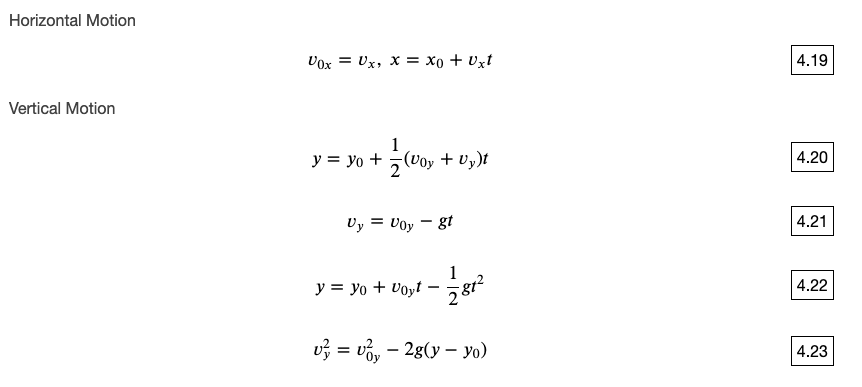

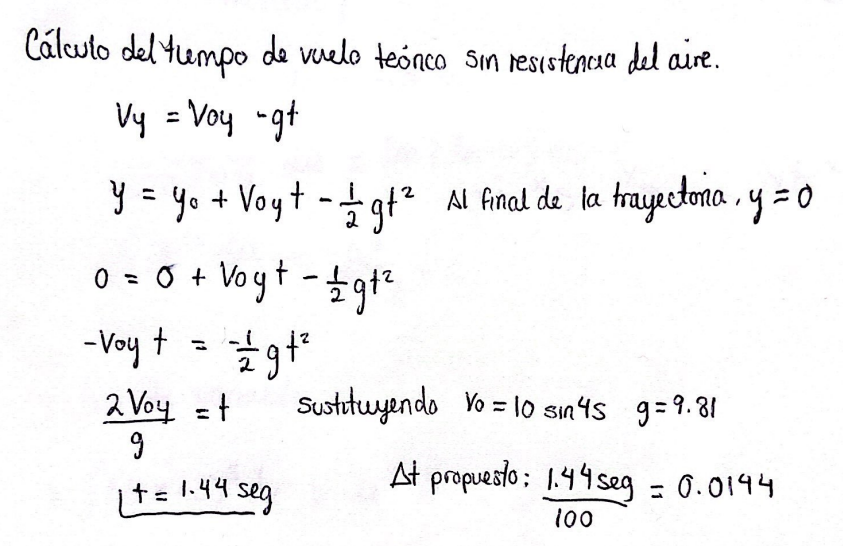

Parametros

In [147]:
import numpy as np




In [148]:
#posición inicial
x0 = 0
y0 = 0
#ángulo inicial
theta0 = 45
#velocidad inicial y sus componentes
v0 = 10
vx0 = v0*np.cos(theta0)
vy0 = v0*np.sin(theta0)
#parametros del problema
n = 1
k = 0
g = 9.81
#arreglo de tiempo

tv = 2*vy0/g
tInc = 0.00144
tStop = (1.+ tInc)*tv
t = np.arange(0., tStop, tInc)

u0 = np.array([x0,vx0,y0,vy0])

#Energía mecánica inicial
E_inicial= (0.5)*(v0**2)+ g*y0

In [149]:
#función que describe el movimiento de in tiroparabolico
def tiroparab(u, t, *args):
    v = (u[1]**2+u[3]**2)**0.5
    derivs = np.array([u[1],-k*(v)**(n-1)*u[1],u[3],-k*(v)**(n-1)*u[3]-g])
    return derivs

In [150]:
#Función que general la matriz u (x,vx,y,vy)

def Runge_kutta_4to(f_user, U0, t, *args):

    n = t.size
    neq = U0.size
    u = np.zeros((n, neq))

    u[0] = U0
    
    dt = t[1]-t[0]
    
    for i in range(n-1):
        k1 = f_user(u[i], t[i],*args)
        k2 = f_user(u[i]+(1/2)*k1*dt, t[i+1]+ (1/2)*dt,*args )
        k3 = f_user(u[i]+(1/2)*k2*dt, t[i+1]+ (1/2)*dt,*args )
        k4 = f_user(u[i]+ k3*dt, t[i+1]+ dt,*args)
        u[i+1] = u[i] + (1/6)*dt*(k1+2*k2+2*k3+k4)
    return u


In [151]:
#Obtener las listas de vy y y para diferentes fricciones y diferentes n


p_sfn1 = Runge_kutta_4to(tiroparab,u0, t, g, k, n)
y_sfn1= p_sfn1[:,2]
vy_sfn1= p_sfn1[:,3]

k = 0.1

p_01n1 = Runge_kutta_4to(tiroparab,u0, t, g, k, n)
y_01n1= p_01n1[:,2]
vy_01n1= p_01n1[:,3]

n = 2

p_01n2 = Runge_kutta_4to(tiroparab,u0, t, g, k, n)
y_01n2 = p_01n2[:,2]
vy_01n2 = p_01n2[:,3]

k=0.5

p_05n2 = Runge_kutta_4to(tiroparab,u0, t, g, k, n)
y_05n2 = p_05n2[:,2]
vy_05n2 = p_05n2[:,3]




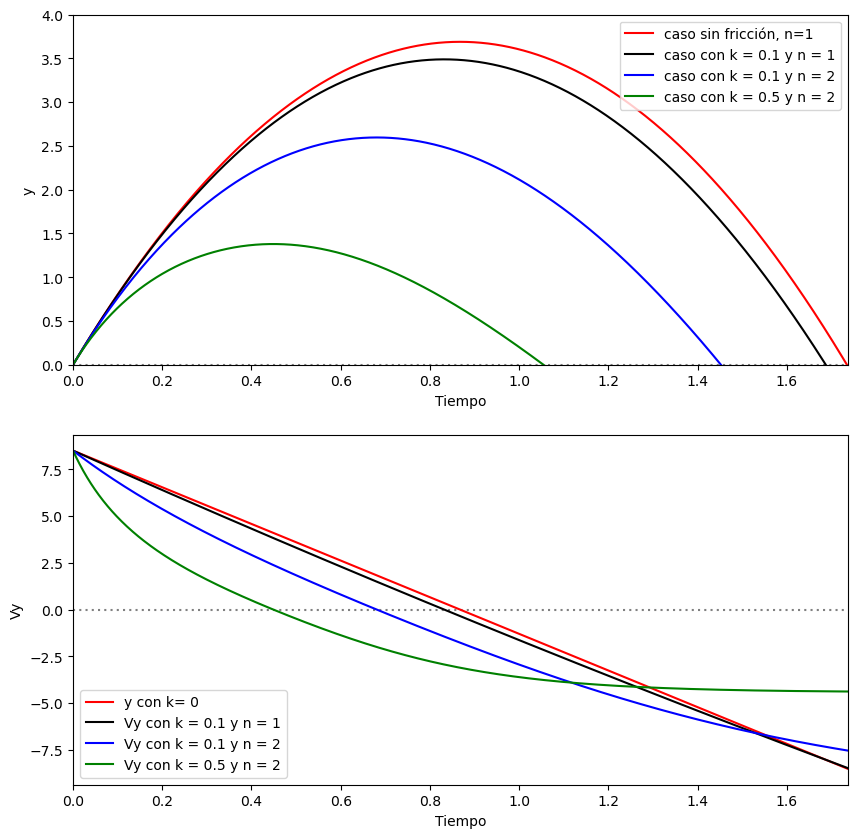

In [152]:
#Gráfica de la posición en y vs el tiempo

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(t,y_sfn1,color = 'red',label = "caso sin fricción, n=1")
plt.plot(t,y_01n1, color='black',label = "caso con k = 0.1 y n = 1")
plt.plot(t,y_01n2,  color='blue',label = "caso con k = 0.1 y n = 2")
plt.plot(t,y_05n2,  color='green',label = "caso con k = 0.5 y n = 2")

plt.xlabel('Tiempo')
plt.ylabel('y')
plt.xlim(0.,tStop)
plt.ylim(0.,4)
plt.axhline(color='gray',dashes=(1, 2),zorder=-1)
plt.legend(loc = 'upper right')

# Gráfica de la Velocidad como función de tiempo
plt.subplot(2,1,2)
plt.plot(t,vy_sfn1,color = 'red',label = "y con k= 0")
plt.plot(t,vy_01n1,  color='black',label = "Vy con k = 0.1 y n = 1")
plt.plot(t,vy_01n2, color='blue',label = "Vy con k = 0.1 y n = 2")
plt.plot(t,vy_05n2, color='green',label = "Vy con k = 0.5 y n = 2")

plt.xlabel('Tiempo')
plt.ylabel('Vy')
plt.xlim(0., tStop)
plt.axhline(color='grey',dashes=(1, 2),zorder=-1)
plt.legend(loc = 'lower left')


plt.show()


Inicialmente se tenían previstas 100 divisiones para el tiempo ( intervalos de 0.0144), sin embargo al aumentar las iteraciones, las diferencias entre los diferentes casos (variando n y la fricción) se hacen un poco más marcadas ya que aumenta la precisión.  

De la primera gráfica se puede observar que la altura máxima disminuye conforme el coeficiente de fricción aumenta, sin embargo, el coeficiente k no afecta tanto como lo hace el coeficiente n, ya que podemos ver que las parábolas negra y azul tienen el mismo k=0.1 pero la axul cae primero y se eleva menos debido a un mayor n.

De la segunda gráfica podemos apreciar que la fricción también influye en que lleguen a Vy=0 en un menor tiempo.

In [160]:
#Cálculo de la energía cinética para el caso sin fricción y para el caso de k=0.5


rapid_sfn1= np.sqrt(p_sfn1[:,1]**2+p_sfn1[:,3]**2)
E_sfn1= (0.5)*(rapid_sfn1**2)+g*p_sfn1[:,2]
delt_Esfn1=E_sfn1-E_inicial


rapid_01n1= np.sqrt(p_01n1[:,1]**2+p_01n1[:,3]**2)
E_01n1= (0.5)*(rapid_01n1**2)+g*p_01n1[:,2]
delt_E01n1=E_01n1-E_inicial





rapid_05n2= np.sqrt(p_05n2[:,1]**2+p_05n2[:,3]**2)
E_05n2= (0.5)*(rapid_05n2**2)+g*p_05n2[:,2]
delt_E05n2= E_05n2- E_inicial




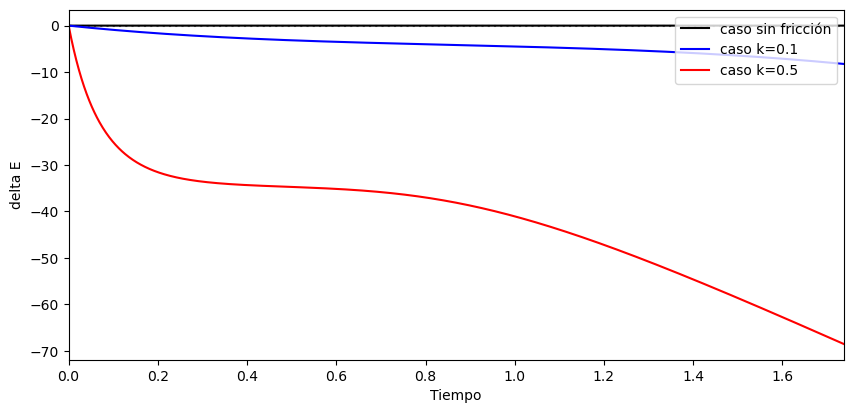

In [161]:
#Gráfica del cambio en la energía cinética vs tiempo

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

plt.plot(t,delt_Esfn1,color = 'black',label = "caso sin fricción")
plt.plot(t,delt_E01n1,color = 'blue',label = "caso k=0.1 ")
plt.plot(t,delt_E05n2,color = 'red',label = "caso k=0.5 ")

plt.xlabel('Tiempo')
plt.ylabel('delta E')
plt.xlim(0.,tStop)
plt.axhline(color='gray',dashes=(1, 2),zorder=-1)
plt.legend(loc = 'upper right')






En el caso sin fricción la energía se conserva, no obstante a medida que va  aumentando la fricción hay más perdida de energía mecánica por lo que la diferencia entre la energía actual y la inicial va aumentando con el tiempo.